In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
df_train = pd.read_csv('ml2_train.csv')
df_test = pd.read_csv('ml2_test.csv')
y_train = df_train['2016 Deposits']
df_train_all = df_train
df_test_all = df_test
df_train.head()

,Serial Number,Main Office,Branch Number,Established Date,Acquired Date,City,County,State,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits
0,1,0,2866,02/06/1910,11/13/2004,Wales,Waukesha,WI,21386.0,23981.0,24825.0,26908.0,30681.0,30680.0,37564
1,2,0,2867,02/28/1910,11/13/2004,Germantown,Washington,WI,55454.0,56564.0,64732.0,73523.0,81357.0,89270.0,106177
2,3,0,2868,05/06/1907,11/13/2004,Brookfield,Waukesha,WI,90882.0,104300.0,125038.0,125906.0,132501.0,137363.0,145054
3,4,0,2869,06/20/1936,11/13/2004,Pewaukee,Waukesha,WI,45674.0,49288.0,53251.0,70402.0,74742.0,73837.0,85996
4,5,0,2870,04/22/1963,11/13/2004,Waukesha,Waukesha,WI,64181.0,72217.0,69920.0,80703.0,75971.0,73225.0,81706


In [5]:
df_train.apply(lambda x: sum(x.isnull()),axis=0)

Serial Number          0
Main Office            0
Branch Number          0
Established Date       0
Acquired Date       1493
City                   0
County                 0
State                  0
2010 Deposits        740
2011 Deposits        578
2012 Deposits        329
2013 Deposits        175
2014 Deposits         56
2015 Deposits         19
2016 Deposits          0
dtype: int64

In [6]:
df_train = df_train.drop(['Serial Number','Main Office','Branch Number','Established Date','Acquired Date','City','County','State','2016 Deposits'],axis=1)
df_test = df_test.drop(['Serial Numer','Main Office','Branch Number','Established Date','Acquired Date','City','County','State'],axis=1)
df_train = df_train.fillna(df_train.mean())
df_train.apply(lambda x: sum(x.isnull()),axis=0)

2010 Deposits    0
2011 Deposits    0
2012 Deposits    0
2013 Deposits    0
2014 Deposits    0
2015 Deposits    0
dtype: int64

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_train_minmax = min_max_scaler.fit_transform(df_train)
df_test_minmax = min_max_scaler.transform(df_test)
df_train_minmax

array([[0.00013925, 0.00012337, 0.00011971, 0.00012045, 0.00012702,
        0.00011742],
       [0.00036108, 0.00029099, 0.00031216, 0.00032912, 0.00033683,
        0.00034165],
       [0.00059177, 0.00053656, 0.00060298, 0.0005636 , 0.00054857,
        0.00052571],
       ...,
       [0.00073066, 0.00064569, 0.0006217 , 0.0006105 , 0.00060276,
        0.00060326],
       [0.00073066, 0.00064569, 0.0006217 , 0.0006105 , 0.00060276,
        0.00060326],
       [0.00073066, 0.00064569, 0.0006217 , 0.0006105 , 0.00060276,
        0.00060326]])

In [9]:
df_train_mean = df_train.mean()
df_train = df_train/df_train_mean
df_test_mean = df_test.mean()
df_test = df_test/df_test_mean
df_train.head()

,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits
0,0.190583,0.191063,0.192561,0.197298,0.210733,0.194635
1,0.494183,0.450660,0.502109,0.539093,0.558803,0.566333
2,0.809903,0.830985,0.969887,0.923181,0.910087,0.871437
3,0.407028,0.392690,0.413054,0.516209,0.513368,0.468425
4,0.571955,0.575372,0.542351,0.591739,0.521809,0.464543


In [10]:
rows = df_train.columns
year = []
for i in rows:
    year.append(int(i.split(" ")[0]))
year

[2010, 2011, 2012, 2013, 2014, 2015]

ValueError: x and y must have same first dimension, but have shapes (6,) and (3790,)

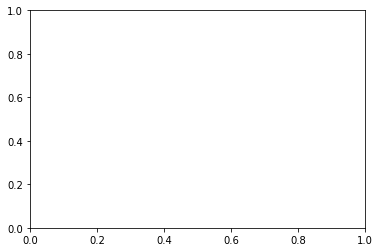

In [116]:
plt.plot(year,df_train['2010 Deposits'])

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
regr = LinearRegression()
regr.fit(df_train,y_train)
op_pred = regr.predict(df_test)
op_pred

array([ 2.23728564e+08,  6.77675911e+04,  5.49960145e+04, ...,
        1.20175983e+04,  8.21758953e+03, -3.58785224e+03])

In [29]:
index = df_test_all['Serial Numer']
columns = ['2016 Deposits']
df_out = pd.DataFrame(data=op_pred,index=index,columns=columns)
df_out.head()

,2016 Deposits
Serial Numer,
1,2.237286e+08
2,6.776759e+04
3,5.499601e+04
4,1.706806e+04
5,4.157992e+04


In [35]:
df_out = df_out.sort_values('2016 Deposits')

In [36]:
df_out.to_csv('ml2_Submissions.csv')